In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.neural_network import MLPClassifier as mlp
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import AdaBoostClassifier as ada

from scipy import stats

import math
import os
import random

In [8]:
## Move to correct folder for server.  Can remove before sending
# os.chdir('/home/poblivsig/Dropbox/horses2')
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [9]:
## Open the pre-processed csv
df = pd.read_csv('data/phishing.csv')

In [10]:
## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)



Shape

(11055, 32)
Columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')
dtypes

id                             int64
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeratio

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


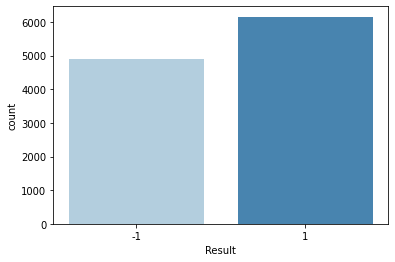

In [26]:
# Count the different quality values
sns.countplot(df['Result'],
              palette='Blues',
              label="Quality Count", )
plt.plot()
plt.savefig('data/charts/phishing_countplot.png')

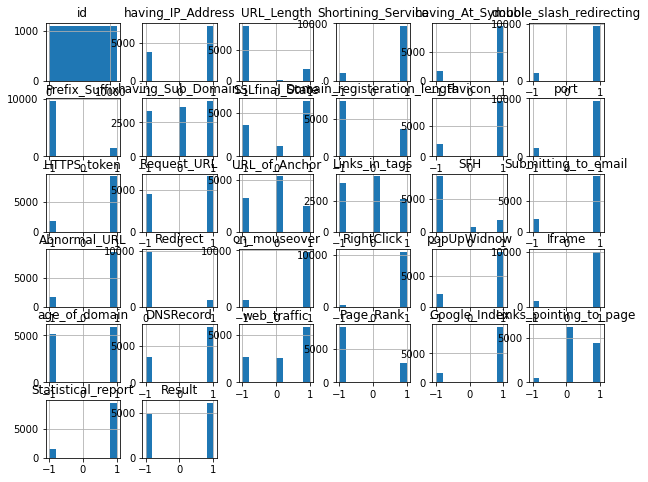

In [12]:
# Create mini-histograms for each attribute
df.hist(bins=10,
        figsize=(10, 8))
plt.show()


In [13]:
# Find the amount of correlation between each column and the quality
corrs = df.corr()
corr_quality = corrs['Result']
print('Amount of correlation (Pearsons r) for each column:')
print(corr_quality.sort_values(ascending=False))

Amount of correlation (Pearsons r) for each column:
Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IP_Address              0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URL_Length                     0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
id                             0.000978
popUpWidnow                 

ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (1).

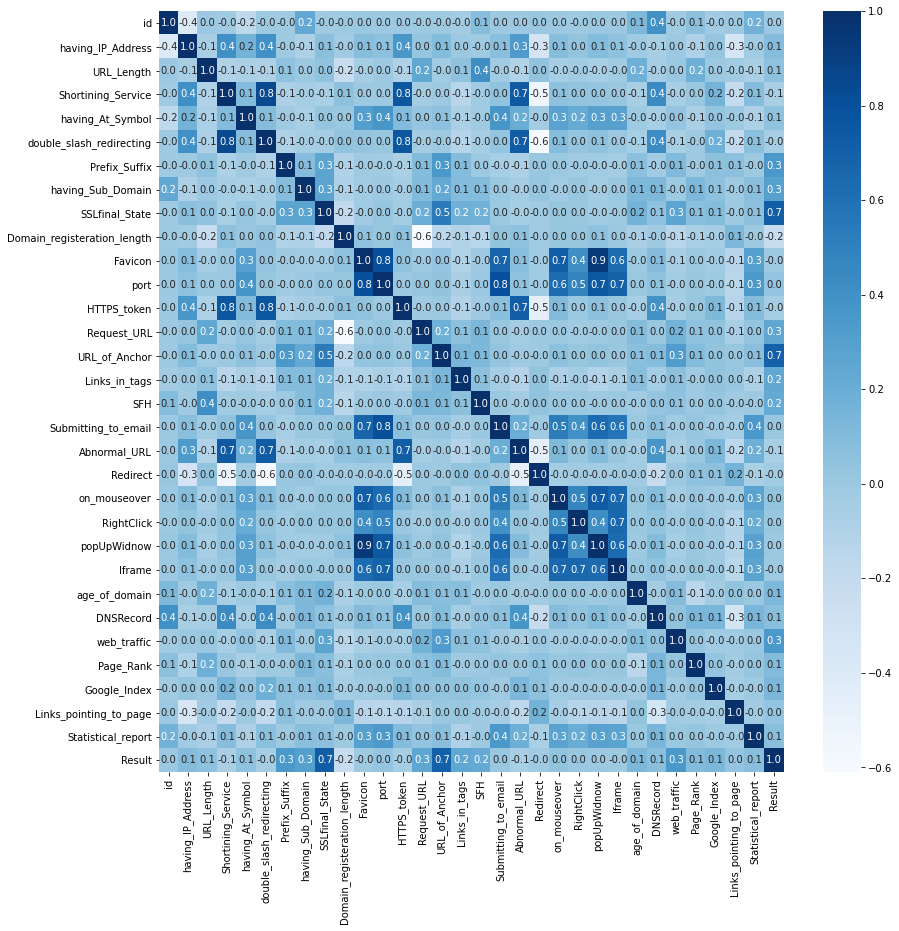

In [25]:
col_names = ['Result',
             'SSLfinal_State',
             'URL_of_Anchor',
             'Prefix_Suffix',
             'web_traffic',
             'having_Sub_Domain',
             'Request_URL''',
             'Links_in_tags',
             'SFH''',
             'Google_Index',
             'age_of_domain',
             'Page_Rank',
             'having_IP_Address',
             'Statistical_report',
             'DNSRecord',
             'URL_Length',
             'having_At_Symbol',
             'on_mouseover',
             'port',
             'Links_pointing_to_page',
             'Submitting_to_email',
             'RightClick',
             'id',
             'popUpWidnow',
             'Favicon',
             'Iframe',
             'Redirect',
             'double_slash_redirecting',
             'HTTPS_token',
             'Abnormal_URL',
             'Shortining_Service',
             'Domain_registeration_length'],
fig, ax = plt.subplots(figsize=(14, 14))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".1f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.savefig('data/charts/phishing_heatmap.png')
plt.show()

In [14]:
## Split up the data

y = df['Result']
X = df.drop('Result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=15)
print(df.shape)

(11055, 32)


In [15]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# print(cross_val_score(decisiontreeclassifier(criterion = 'gini', random_state = 0), x_train, y_train, cv=5))
def gridsearch(estimator, param_grid, cv):
    # criterion = ['gini', 'entropy']
    # hah = dict(criterion=criterion)
    clf = gridsearchcv(estimator=estimator,
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv=cv,
                       return_train_score=True,
                       scoring=make_scorer(mean_squared_error))

    clf.fit(X_train, y_train)

    ### Output the results

    print(f'Best parameters: {clf.best_params_}')
    print(f'Best score: {clf.best_score_}')
    best_estimate = clf.best_estimator_
    print(best_estimate)

    ## Now we have found the best parameters, use them...
    best_estimate.fit(X_train,y_train)

    predictor = best_estimate.predict(X_train)
    mse = mean_squared_error(predictor, y_train)
    r2 = r2_score(predictor, y_train)
    print(f'Training Mean Square Error: {mse:.2f}')
    print(f'Training R2: {r2:.2f}')

    y_predictor = best_estimate.predict(X_test)
    mse = mean_squared_error(y_test, y_predictor)
    r2 = r2_score(y_test, y_predictor)
    print(f'Testing Mean Square Error: {mse:.2f}')
    print(f'Testing R2: {r2:.2f}')
    print('blah')

    return best_estimate, y_predictor


In [20]:
def cm_and_class_rep(X_test, y_test, y_predictor, best_estimate):
    confusion_matrix(y_test, y_predictor)
    cm = plot_confusion_matrix(best_estimate,
                               X_test,
                               y_test,
                               cmap=plt.cm.Blues,
                               normalize='true' )
    plt.show(cm)
    plt.show()
    print(classification_report(y_test, y_predictor))

In [18]:
def draw_learning_curve(estimator, X_train, y_train, cv, train_max, title):

    # Do the curbe
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='recall',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Standard Deviation and Mean of training scores
    Standard_Deviation_training = np.std(training_scores, axis=1)
    mean_training = np.mean(training_scores, axis=1)
    print(f'mean_training = {mean_training}')
    print(f'\nTraining SD = {Standard_Deviation_training}')

    # Standard Deviation and Mean of testing scores
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
    mean_testing = np.mean(testing_scores, axis=1)
    print(f'mean_testing = {mean_testing}')
    print(f'\nTesting SD = {Standard_Deviation_testing}')

    # Do the plot
    plt.plot(sizes, mean_training, '--', label='Training Score', color='r')
    plt.plot(sizes, mean_testing, color='b', label='Cross Validation Score')
    plt.title(title)
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('data/charts/dt_learning_curve.png')
    plt.show()



Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 1}
Best score: 0.4564555966737033
DecisionTreeClassifier(max_depth=1)
Training Mean Square Error: 0.46
Training R2: 0.53
Testing Mean Square Error: 0.42
Testing R2: 0.58
blah
              precision    recall  f1-score   support

          -1       0.90      0.86      0.88      1470
           1       0.89      0.92      0.91      1847

    accuracy                           0.90      3317
   macro avg       0.90      0.89      0.89      3317
weighted avg       0.90      0.90      0.90      3317



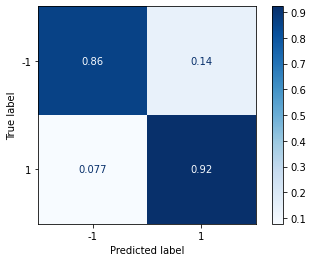

<Figure size 432x288 with 0 Axes>

In [21]:
# Do Decision Tree stuff...

# Do a grid search for the Decision Tree
dt_criterion = ['gini', 'entropy']
dt_max_depth = [count for count in range(1, 60)]
dt_class_weight = [None, 'balanced']
param_grid = dict(criterion=dt_criterion,
                  max_depth=dt_max_depth,
                  class_weight=dt_class_weight)

best_estimate, y_predictor = gridsearch(estimator=dtc(), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)


/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean_training = [0.875      0.825      0.96875    0.9375     0.90789474 0.92708333
 0.9125     0.92279412 0.90789474 0.91860465 0.88843202 0.89880952
 0.90500585 0.91058612 0.91893585 0.91432524 0.91916369 0.9222512
 0.91703677 0.92103821 0.92480942 0.91934893 0.91484046 0.90987762
 0.91327277 0.91733156 0.91271547 0.91786353 0.92031539 0.92168809
 0.92533422 0.92806278 0.92872621 0.92668349 0.9241081  0.91645833
 0.91038629 0.90763534 0.90994053 0.91135292 0.91413101 0.91219519
 0.91128123 0.91316197 0.91394124 0.91652388 0.91509197 0.91586424
 0.91726267 0.91930851 0.91708375 0.91502857 0.91623711 0.91737288
 0.91809922 0.91703766 0.91844443 0.9200219  0.91864446 0.91761747
 0.91394659 0.91283889 0.91452497 0.91316042 0.91131039 0.91223722
 0.9112452  0.91198107 0.90866247 0.9093054  0.91064815 0.91052297
 0.90978753 0.9106394  0.90807831 0.9091106  0.90731688 0.90408367
 0.90499538 0.90402299 0.90475807 0.90384312 0.9028664  0.90217063
 0.90304092 0.90376861 0.90528581 0.90424033 0.

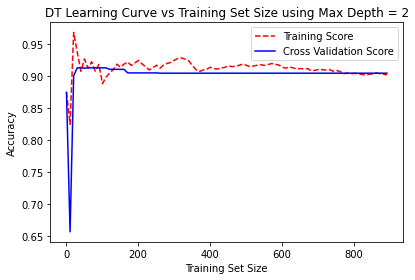

In [28]:
# Decision Tree learning curve

## TODO: Grab these values from best_estimate above
tuned_criterion = 'entropy'
tuned_max_depth=2
tuned_class_weight='None'

# Best depth
draw_learning_curve(dtc(criterion=tuned_criterion,
                        max_depth=tuned_max_depth,
                        class_weight=tuned_class_weight),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=900,
                        title = 'DT Learning Curve vs Training Set Size using Max Depth = 2')

/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean_training = [0.875      1.         1.         1.         1.         1.
 1.         1.         0.99671053 0.99754902 0.99780702 0.99603175
 0.99464286 0.99671053 0.97640327 0.9664751  0.9887714  0.99489796
 0.99029126 0.96876787 0.96349835 0.96541323 0.96507714 0.97349809
 0.96470343 0.96639265 0.95935735 0.96483221 0.96864085 0.96374961
 0.95935829 0.96438252 0.96436311 0.98993014 0.96702396 0.96640625
 0.96306347 0.96333298 0.96602088 0.96656304 0.96361175 0.9602422
 0.96151783 0.95567111 0.96282252 0.96393533 0.96477083 0.96501482
 0.96532298 0.99135801 0.98897133 0.98910541 0.98926117 0.98940678
 0.9878874  0.98242393 0.98272735 0.98306394 0.98063755 0.97836183
 0.95808605 0.95330361 0.95471888 0.92126297 0.93203521 0.93979187
 0.95249106 0.95290775 0.95148221 0.97851646 0.97883305 0.96360654
 0.96204502 0.96272083 0.95085331 0.95125356 0.94732012 0.94467218
 0.94519625 0.94775588 0.94815415 0.9487175  0.94537099 0.96680482
 0.9671057  0.95054625 0.951324   0.96614797 0.96645617

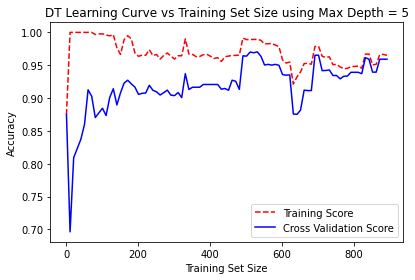

In [31]:
# Comparison depth
draw_learning_curve(dtc(criterion='entropy',
                        max_depth=5,
                        class_weight='None'),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=900,
                        title = 'DT Learning Curve vs Training Set Size using Max Depth = 5')

/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean_training = [0.875      0.825      0.96875    0.9375     0.90789474 0.92708333
 0.97083333 0.97426471 0.95394737 0.95930233 0.94311952 0.94742063
 0.95161007 0.95364833 0.95794353 0.91719881 0.95243419 0.95429661
 0.956698   0.95875024 0.95846327 0.96053697 0.9615007  0.95422759
 0.95587928 0.95799081 0.96181377 0.96397092 0.96540477 0.9660362
 0.9676025  0.96879723 0.96870878 0.96993868 0.96639265 0.94424479
 0.95928225 0.96025149 0.96125017 0.9618675  0.96305865 0.96356803
 0.96098135 0.96149738 0.96127293 0.96241712 0.95992323 0.96075508
 0.96115787 0.96211492 0.95941273 0.95990747 0.9604811  0.96101695
 0.9611427  0.9591289  0.95982769 0.96060738 0.95855771 0.95672366
 0.9365727  0.93509486 0.93664938 0.93491221 0.95236938 0.95271067
 0.95109422 0.95186814 0.95011522 0.95031936 0.95105402 0.95101781
 0.94963645 0.95011156 0.91333821 0.91428092 0.91243737 0.90913118
 0.90998364 0.90890805 0.90957667 0.9086184  0.90763097 0.90686158
 0.90768066 0.9083385  0.90981673 0.90870462 0.

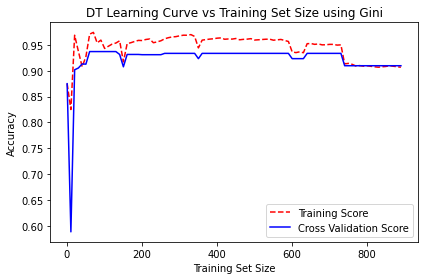

In [33]:
# Comparison criterion gini
draw_learning_curve(dtc(criterion='gini',
                        max_depth=2,
                        class_weight='None'),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=900,
                        title = 'DT Learning Curve vs Training Set Size using Gini')


In [ ]:
# Do MLP stuff...
MAX_LAYER_SIZE = 30
hidden_layer_sizes = [layers for layers in range(1, MAX_LAYER_SIZE)]
activation = ['tanh', 'relu']
max_iter = [500, 1000, 1500, 2000, 2500]
alpha = 10.0 ** -np.arange(1,7)
learning_rate = ['constant', 'adaptive']
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes,
                  activation=activation,
                  max_iter=max_iter,
                  alpha=alpha,
                  learning_rate=learning_rate)

best_estimate, y_predictor = gridsearch(estimator=mlp(), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

In [ ]:
# MLP learning curve

draw_learning_curve(mlp(hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        max_iter=max_iter,
                        alpha=alpha,
                        learning_rate=),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=500,
                        title = 'MLP Learning Curve vs Training Set Size')

In [ ]:
# Do KNN stuff
# Set the parameters by cross-validation
MAX_NEIGHBOURS=60
n_neighbours=[layers for layers in range(1, MAX_NEIGHBOURS)]
metric=['manhattan', 'euclidean', 'dice', 'chebyshev']
weights=['uniform', 'distance']
algorithm=['auto', 'kd_tree']
param_grid = dict(n_neighbours=[n_neighbours],
                  metric=metric,
                  weights=weights,
                  algorithm=algorithm)
best_estimate, y_predictor = gridsearch(estimator=knn(), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)


In [ ]:
# KNN learning curve

draw_learning_curve(knn(n_neighbours=,
                        metric=,
                        weights=,
                        algorithm=),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=500,
                        title = 'KNN Learning Curve vs Training Set Size')

In [ ]:
# Do Boosting stuff
# Set the parameters by cross-validation
ada_learning_rate = [(2**x)/100 for x in range(7)]
ada_n_estimators = [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# N.B. These hyper-parameters are from previous decision tree tuning.
ada_dt = dtc(criterion=tuned_criterion,
             max_depth=tuned_max_depth,
             class_weight=tuned_class_weight)
param_grid = dict(learning_rate=ada_learning_rate,
                  n_estimators=ada_n_estimators)
best_estimate, y_predictor = gridsearch(estimator=ada(ada_dt), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)


In [ ]:
# Boosting learning curve
draw_learning_curve(ada(n_neighbours=,
                        metric=,
                        weights=,
                        algorithm=),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=500,
                        title = 'AdaBoost Learning Curve vs Training Set Size')